<a href="https://colab.research.google.com/github/yangxu21/ML_summary/blob/main/K_mean_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Ingest**

In [44]:
import pandas as pd
import numpy as np
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


In [41]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)
df.head()

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


## **Make artificial clustering data**
>Generate isotropic Gaussian blobs for clustering.

In [61]:
from sklearn.datasets import make_blobs

x, y = make_blobs(centers=8, n_features=12, shuffle=True, random_state=12)

##**Standardization**

*   Using preprocessing in **sklearn**
*   Recommand to use **Pipeline**



In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Fit to data and predict using pipelined scaling, KMeans.
std_clf = make_pipeline(StandardScaler(), KMeans(n_init=10, n_clusters=3))
kmeans = std_clf.fit(numerical_df)

## or use pipeline (with naming the estimators)
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_init=10, n_clusters=3))])
kmeans1 = pipe.fit(numerical_df)

print(kmeans1.named_steps) # Access the steps by name.
print(kmeans1.n_features_in_) # Number of features seen during first step fit method.

# Fit to data and predict without pipeline
k_means2 = KMeans(n_init=10, n_clusters=3)
scaler = StandardScaler()
scaler.fit(numerical_df)
kmeans2_result = k_means2.fit(scaler.transform(numerical_df))

print(kmeans2_result.cluster_centers_) # Coordinates of cluster centers.
print(kmeans2_result.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
print(kmeans2_result.labels_) # Labels of each point.
print(kmeans2_result.n_iter_) # Number of iterations run.
print(kmeans2_result.n_features_in_) # Number of features seen during fit.

for cluster_center in



{'scaler': StandardScaler(), 'kmeans': KMeans(n_clusters=3, n_init=10)}
4
[[-0.84876222 -0.60018123 -0.59888401 -0.31245746]
 [ 0.83953843 -1.27878494  2.57231074  2.58575455]
 [ 0.72882816  0.7828648   0.23141105 -0.05693605]]
50.385210800016274
[2 2 0 2 2 2 2 2 2 1 2 1 2 2 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0]
5
4


##**Encode the labels into unique integers**

In [62]:
from sklearn.preprocessing import LabelEncoder
y_val = (df.iloc[:,-1:])
encoder = LabelEncoder()
y_val = encoder.fit_transform(np.ravel(y_val))
print(encoder.classes_)
print(encoder.transform(encoder.classes_))
print(encoder.inverse_transform([2,3]))

encoder_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(encoder_mapping)

['cp' 'im' 'imL' 'imS' 'imU' 'om' 'omL' 'pp']
[0 1 2 3 4 5 6 7]
['imL' 'imS']
{'cp': 0, 'im': 1, 'imL': 2, 'imS': 3, 'imU': 4, 'om': 5, 'omL': 6, 'pp': 7}


## **Mini-Batch K-Means clustering**
* It is a version of the K-means algorithm which can be used instead of the K-means algorithm when clustering on huge datasets. It creates random batches of data to be stored in memory, then a random batch of data is collected on each iteration to update the clusters.
* It uses small, random, fixed-size batches of data to store in memory, and then with each iteration, a random sample of the data is collected and used to update the clusters.

In [76]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

mini_kmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=256)
results = kmeans.fit_predict(scaler.transform(numerical_df))
print(results)


[2 2 1 2 2 2 2 2 1 0 2 0 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


## **Write K-means from scratch**

In [ ]:
import random
from math import fsum, sqrt
from statistics import mean
from collections import defaultdict
# Defaultdict is a container like dictionaries present in the module collections.
# Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object.
# The functionality of both dictionaries and defaultdict are almost same except for the fact
# that defaultdict never raises a KeyError. It provides a default value for the key that does not exists.

def transpose(matrix):
    'Swap rows with columns for a 2-D array'

    return zip(*matrix)

def dist(point_x1, point_x2):
    'Multi-dimensional euclidean distance'

    return sqrt(fsum((x1 - x2) ** 2.0 for x1, x2 in zip(point_x1, point_x2)))

def assign_data(centroids, data):
    'Assign data the closest centroid'

    d : DefaultDict[Point, List[Point]] = defaultdict(list)
    for point in data:
        centroid: Point = min(centroids, key=partial(dist, point))
        d[centroid].append(point)
    return dict(d)

def compute_centroids(groups):
    'Compute the centroid of each group'

    return [tuple(map(mean, transpose(group))) for group in groups]

def k_means(data, k=2, iterations=10):
    'Return k-centroids for the data'

    data = list(data)
    random.seed(0)
    centroids = random.sample(data, k)
    for i in range(iterations):
        labeled = assign_data(centroids, data)
        centroids = compute_centroids(labeled.values())
    return centroids



##**K-means diagnostics**

1. **Elbow plot**
> Elbow method calculates the average distance from centroid for each value
2. **Silhouettee analysis**
* a(i): the average distance of the point i to other point in the same cluster
* b(i): the average distance of the point i to the nearest other cluster
* If a(i) > b(i), i may be misclassified
* silhouette coefficient of i: (b-a)/(the larger of b and a)
* Range from 1 (best) to -1 (worst)

3. **Intercluster distance map**

### Elbow method

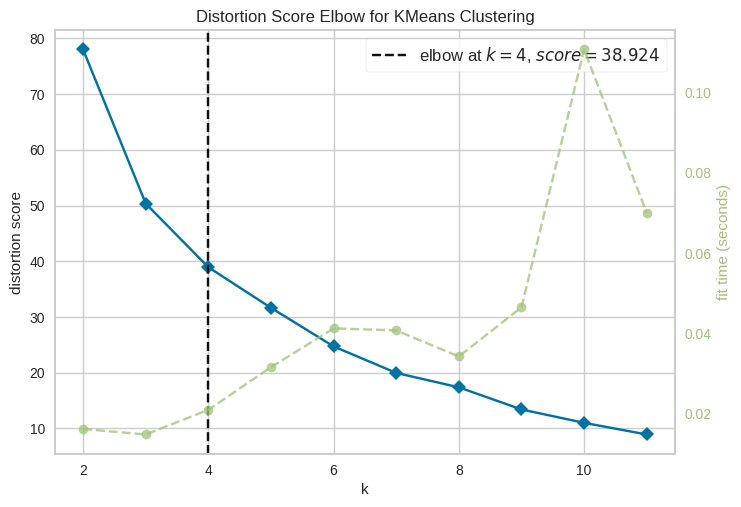

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# Elbow plot using yellowbrick

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10)
scaler = StandardScaler()
visualizer = KElbowVisualizer(model, k=(2,12))

scaler.fit(numerical_df)
visualizer.fit(scaler.transform(numerical_df))
visualizer.poof()

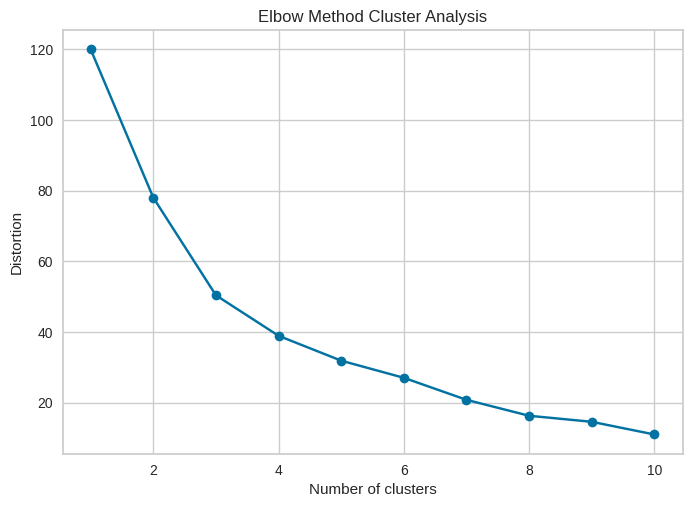

In [57]:
# Elbow plot (from scratch)

import matplotlib.pyplot as plt

distortion=[]
for i in range(1,11):
  km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
  km.fit(scaler.transform(numerical_df))
  distortion.append(km.inertia_)

plt.plot(range(1,11), distortion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method Cluster Analysis')
plt.show()

###Sihouettee analysis

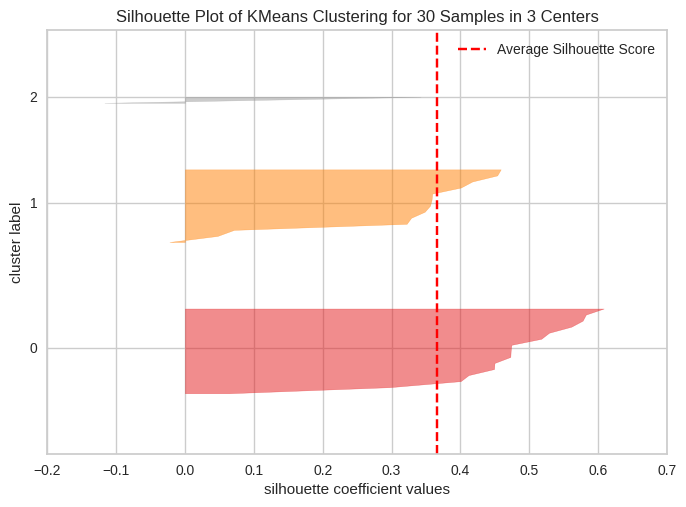

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# Sihouettee analysis using yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_init=10, n_clusters=3))
visualizer.fit(scaler.transform(numerical_df))
visualizer.poof()

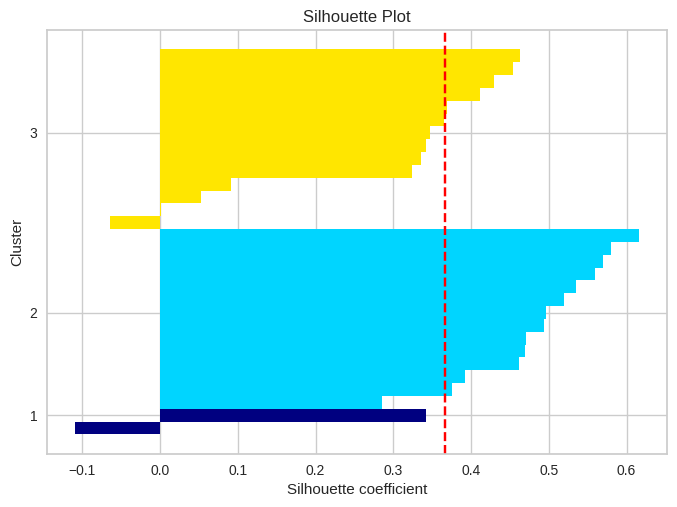

<Figure size 2000x1000 with 0 Axes>

In [73]:
# Silhouettee analysis (from scratch)

from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(scaler.transform(numerical_df))

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(numerical_df), y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_val = silhouette_vals[y_km == c]
  c_silhouette_val.sort()
  y_ax_upper += len(c_silhouette_val)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_val, height=1.0, edgecolor='none',color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2)
  y_ax_lower += len(c_silhouette_val)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot')
plt.figure(figsize=(20,10))
plt.show()


### Intercluster distance maps
>Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


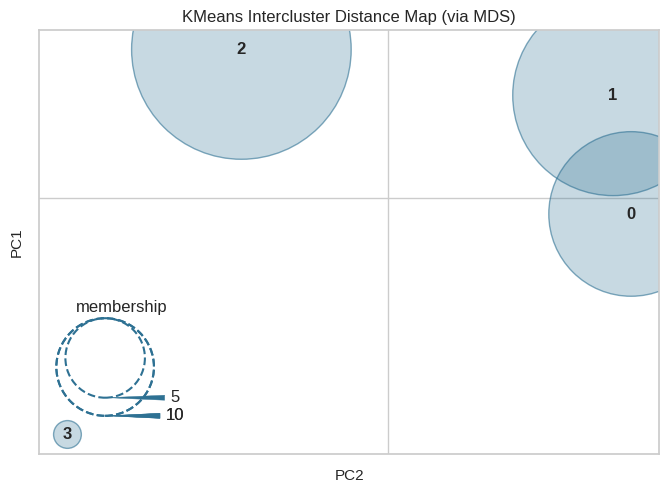

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [82]:
from yellowbrick.cluster import InterclusterDistance

visulizer = InterclusterDistance(KMeans(n_clusters=4, n_init=10))

visulizer.fit(scaler.transform(numerical_df))
visulizer.poof()

## multiprocessing module
* multiprocessing
* AWS Sagemaker (Auto-Hyper Parameters)
* AWS Batch
* AWS EMR/Spark
* AWS Deep Learning Spot Instances

In [83]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
from multiprocessing import Pool
import time

def do_kmeans(n_samples):
  """KMeans clustering on generated data"""

  X,_ = make_blobs(n_samples, centers=3, n_features=10, random_state=0)
  kmeans = KMeans(n_clusters=3, n_init=10)
  t0 = time.time()
  kmeans.fit(X)
  print(f"KMeans cluster fit in {time.time()-t0}")

def run_parallel():
  """Run everything"""

  count = 25
  t0 = time.time()
  with Pool(2) as p:
    p.map(do_kmeans, [100000 for x in range(count)])
  print(f"Performed {count} KMeans in total time: {time.time()-t0}")

run_parallel()
